# InstaBot : Part 2

$Sumbitted By - Gurpreet Singh, singh.gurpreet513@gmail.com$

In [189]:
#importing necessary libraries that will be overall in use
from selenium import webdriver
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup

## Question 1

In [4]:
# first we will login
driver = webdriver.Chrome(executable_path = 'c://webdrivers/chromedriver')
driver.get('https://www.instagram.com/')

wait = WebDriverWait(driver,10)
notNow = wait.until(EC.presence_of_element_located((By.NAME,'username')))
username = driver.find_element_by_name('username')
password = driver.find_element_by_name('password')

username.send_keys('SAMPLE USERNAME')
password.send_keys('SAMPLE PASSWORD')
username.submit()

for i in range(2): #because I was getting 2 popups for saving the device and to get notifications
    wait = WebDriverWait(driver,10)
    notNow = wait.until(EC.presence_of_element_located((By.XPATH,'//button[contains(text(),"Not Now")]')))
    notNow.click()

In [7]:
# now we will find the top 10 handle searches
search = driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
search.send_keys('food')
time.sleep(2)
food_list = driver.find_elements_by_class_name('Ap253')
top10food = []
for i in food_list[:10]:
    if i.get_attribute('innerHTML')[0] != '#':
        top10food.append(i.get_attribute('innerHTML'))

In [28]:
# now we will get the top 5 handles with maximum followers
top10foodD = {}
for i in top10food:
    driver.get('https://instagram.com/'+ i)
    noOfFollowers = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span ')
    top10foodD[i] = noOfFollowers.get_attribute('title')

for i in top10foodD:
    netFollowers = ''
    for j in top10foodD[i].split(','):
        netFollowers += j
    
    top10foodD[i] = int(netFollowers)

l = []
for i in top10foodD:
    l.append([top10foodD[i],i])
l.sort(reverse = True)
print('Top 5 handles with the highest followers are:')
for i in l[:5]:
    print('->',*i[::-1])

Top 5 handles with the highest followers are:
-> dilsefoodie 533690
-> foodtalkindia 298379
-> street_food_chandigarh 78258
-> food 50871
-> foodiesharma_ 13125


In [63]:
# now we will get the no. of posts by those handles in last 3 days
noOfPosts = {}
for i in l[:5]:
    driver.get('https://instagram.com/'+ i[1]) ## straight away redirecting to the profile link is better way as we can observe the link pattern for instagram handles
    count = 0
    try:
        driver.find_element_by_class_name('_9AhH0').click()
    except:
        continue
    
    while True:
        wait = WebDriverWait(driver,10)
        timePost = wait.until(EC.presence_of_element_located((By.TAG_NAME,'time')))       
        time_ = timePost.get_attribute('innerHTML')
        
        if 'h' in time_:
            count+=1
        elif ('d' in time_) and (int(time_[0])<=3):
            count+=1
        else:
            break
        
        try:
            driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
        except:
            break
        time.sleep(1)
    
    noOfPosts[i[1]] = count


print('No. of posts by the top 5 handles in last 3 days:')
for i in noOfPosts:
    print('->',i,noOfPosts[i])
    

No. of posts by the top 5 handles in last 3 days:
-> dilsefoodie 2
-> foodtalkindia 7
-> street_food_chandigarh 4
-> food 8
-> foodiesharma_ 4


foodiesharma_-> No. of followers:13125, No. of Posts in last 3 days:4
food-> No. of followers:50871, No. of Posts in last 3 days:8
street_food_chandigarh-> No. of followers:78258, No. of Posts in last 3 days:4
foodtalkindia-> No. of followers:298379, No. of Posts in last 3 days:7
dilsefoodie-> No. of followers:533690, No. of Posts in last 3 days:2


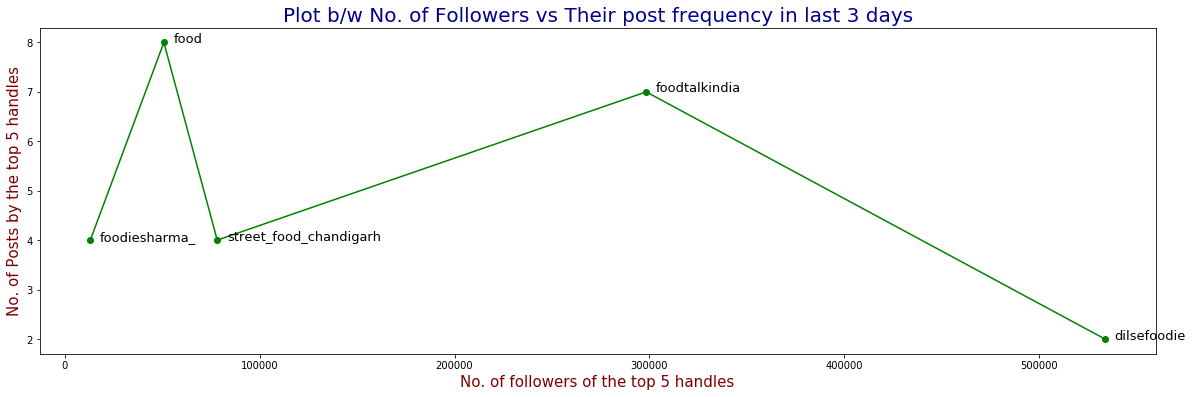

In [112]:
# now we will build a plot between the data that we have of the top 5 handles
top5Names = list(noOfPosts.keys())
x = []
for i in l[:5]:
    x.append(i[0])
y = list(noOfPosts.values())

for i in range(1,6):
    print(top5Names[5-i],'-> No. of followers:',x[5-i],', No. of Posts in last 3 days:', y[5-i], sep="")

plt.rcParams['figure.figsize'] = [20,6]
plt.plot(x,y,'g-o')
for i in range(5):
    plt.text(x[i]+5000,y[i],top5Names[i], rotation=0,fontsize=13)
plt.xlabel('No. of followers of the top 5 handles',color='maroon',fontsize=15)
plt.ylabel('No. of Posts by the top 5 handles',color='maroon',fontsize=15)
plt.title('Plot b/w No. of Followers vs Their post frequency in last 3 days', color='darkblue',fontsize=20)
plt.show()

## Question 2

In [263]:
# first we willl get the content of the first 10 posts of the top 5 handles 
d={}
for k in top5Names:
    d[k]=list()
    
for i in top5Names:
    driver.get('https://instagram.com/'+ i)
    try:
        driver.find_element_by_class_name('_9AhH0').click()
    except:
        continue
    
    j = 1
    
    while j<=10:
        time.sleep(2)
        html=driver.find_element_by_xpath('//div[@class="C4VMK"]/span').get_attribute('innerHTML')
        data=BeautifulSoup(html,'html.parser')
        
        d[i].append(data.text)
        #print(data.text)
        #driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]').click()
        #time.sleep(3)
        try:
            driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
        except:
            break
        #time.sleep(2)
        j+=1   
print(d)

{'dilsefoodie': ['Ye Wali Maggi Taste Kari Hai ?If Yes Then Share Your Reviews#dilsefoodie', 'Dwarka Ke Famous Chur Chur NaanAapne Khaye Hai Yaha Kabhi ?Raju Chur Chur Naan #dilsefoodie', 'Happy Spicy Tawa At Rajouri gardenHave You Been To This Place ?#dilsefoodie', "100years Old Fruit Chaat WalaIt's In Mayapuri Industrial Area Just Outside Of Khalsa Restaurant. You Have To Wait Minimum 30mins For Your Turn #dilsefoodie #healthy #fruitsalad", 'Chicken Salami Salad At Sandy Egg Near Rana Pratap BaghAmazing Food At This Sandy Stall #dilsefoodie', 'Best Place In Nehru Place To Have Chicken Rice And Chinese PlatterSnack Junction - Nehru Place#dilsefoodie', 'Mayapuri Wale Famous Chole KulcheYaha Khaye Hai Kabhi ?#dilsefoodie', 'Laal Maas Recipe By @chefmahendrarajAmazing Recipe 😬#dilsefoodie', 'Use Of Leftover Chicken Curry Turned Into Mix Sauce PastaAmazing mix sauce chicken pasta #dilsefoodie', "PubG Khelna Sikhe Sirf 3.30minute MaiAre You On PubG ?My PUBG I'd : Dilsefoodie"], 'foodtalkin

In [264]:
# trying to remove the extra emojis and symbols
li_words=[]
for i in d.values():
    for j in i:
        j=j.replace('.','')
        j=j.replace('🇫🇷','')
        j=j.replace('?','')
        j=j.replace(',','')
        j=j.replace('+','')
        j=j.replace('=','')
        j=j.replace('"','')
        j=j.replace('!','')
        j=j.replace('-','')
        j=j.replace('@','')
        j=j.replace(':','')
        j=j.replace('🥑','')
        j=j.replace('🍣','')
        j=j.replace('😍🍰','')
        j=j.replace('🍻','')
        j=j.replace('☕️🍫','')
        j=j.replace('✈️','')
        j=j.replace('🍜','')
        j=j.replace('😱','')
        j=j.replace('👉','')
        j=j.replace('😋🍔','')
        j=j.replace('🍨','')
        j=j.replace('🥪','')
        j=j.replace('📸','')
        j=j.replace('🏃\u200d♀️‘','')
        j=j.replace('💻','')
        j=j.replace('👨\u200d👩\u200d👧\u200d👦','')
        for k in j.split():
            li_words.append(k)

In [265]:
# calculating frequency of each word.
freq_words={}
d_words={}
for i in li_words:
    d_words[i]=d_words.get(i,0)+1
d_words

{'Ye': 1,
 'Wali': 1,
 'Maggi': 1,
 'Taste': 1,
 'Kari': 1,
 'Hai': 3,
 'If': 1,
 'Yes': 1,
 'Then': 1,
 'Share': 1,
 'Your': 2,
 'Reviews#dilsefoodie': 1,
 'Dwarka': 1,
 'Ke': 1,
 'Famous': 2,
 'Chur': 4,
 'NaanAapne': 1,
 'Khaye': 2,
 'Yaha': 1,
 'Kabhi': 2,
 'Raju': 1,
 'Naan': 1,
 '#dilsefoodie': 6,
 'Happy': 2,
 'Spicy': 3,
 'Tawa': 1,
 'At': 3,
 'Rajouri': 1,
 'gardenHave': 1,
 'You': 4,
 'Been': 1,
 'To': 3,
 'This': 3,
 'Place': 4,
 '100years': 1,
 'Old': 1,
 'Fruit': 1,
 'Chaat': 1,
 "WalaIt's": 1,
 'In': 4,
 'Mayapuri': 2,
 'Industrial': 1,
 'Area': 1,
 'Just': 1,
 'Outside': 1,
 'Of': 2,
 'Khalsa': 1,
 'Restaurant': 1,
 'Have': 2,
 'Wait': 1,
 'Minimum': 1,
 '30mins': 1,
 'For': 3,
 'Turn': 1,
 '#healthy': 1,
 '#fruitsalad': 1,
 'Chicken': 4,
 'Salami': 1,
 'Salad': 2,
 'Sandy': 2,
 'Egg': 2,
 'Near': 1,
 'Rana': 1,
 'Pratap': 1,
 'BaghAmazing': 1,
 'Food': 2,
 'Stall': 1,
 'Best': 2,
 'Nehru': 2,
 'Rice': 1,
 'And': 2,
 'Chinese': 2,
 'PlatterSnack': 1,
 'Junction': 1,
 'Pl

In [266]:
words=list(d_words.keys())
freq=list(d_words.values())
data={'Words':words, 'Frequency':freq}
df=pd.DataFrame(data)
df.to_csv('Frequency.csv',index=False)

In [270]:
# creating a dictionary to get top hashtags with respect to number of times it is used.
d={}
for i in d_words.keys():
    if '#' in i:
        d[i]=d_words[i]

from collections import Counter
k=Counter(d)
li=k.most_common(5)
for i in li:
    print(i[0],i[1])

#food 10
#foodie 7
#dilsefoodie 6
#indianfood 6
#yum 6


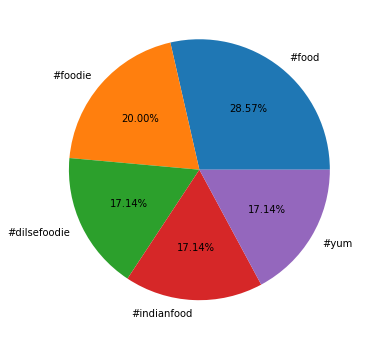

In [271]:
# plotting pie for hastags with percentage times used in scraped posts.
import matplotlib.pyplot as plt
times=[]
tags=[]
for i in li:
    tags.append(i[0])
    times.append(i[1])
plt.pie(times,labels=tags,autopct='%.2f%%')
plt.show()

## Question 3

In [293]:
# dictionary for storing likes of top 10 posts of each handles obtaines earlier.
d_likes={}
for i in top5Names:
    d_likes[i]=list()

In [277]:
for i in top5Names:
    driver.get('https://instagram.com/'+ i)
    
    links_posts=driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]/a')
    for j in links_posts[:10]:
        j.click()
        time.sleep(3)
        try:
            likes=driver.find_element_by_xpath('//div[@class="Nm9Fw"]/button/span').get_attribute('innerHTML')
            d_likes[i].append(likes.replace(',',''))
        except NoSuchElementException:
            driver.find_element_by_xpath('//div[@class="HbPOm _9Ytll"]/span/span').click()
            time.sleep(2)
            likes=driver.find_element_by_xpath('//div[@class="vJRqr"]/span').get_attribute('innerHTML')
            d_likes[i].append(likes.replace(',',''))
            driver.find_element_by_xpath('//div[@class="QhbhU"]').click()
            time.sleep(1)
        driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]').click()
        time.sleep(2)

In [278]:
# Calculating average likes for a handle.
d_likes_new={}
for i in d_likes.keys():
    total=0
    for j in d_likes[i]:
        total+=float(j)
    d_likes_new[i]=total//10
d_likes_new

In [287]:
# followers:like ratio of each handle.
ratio=[]
for i in d_likes_new.keys():
    d_followers[i]=d_followers[i].replace('k','000')
    d_followers[i]=d_followers[i].replace('.','')
    d_followers[i]=d_followers[i].replace('m','00000')
    ratio.append(int(d_followers[i])/d_likes_new[i])
    print(i,'-->',int(d_followers[i])/d_likes_new[i])

In [292]:
# plotting data.
plt.bar(top_handles,ratio)
plt.xticks(rotation=25)
plt.title('Average Followers : Likes Ratio')
plt.show()